In [1]:
from pathlib import Path
from PIL import Image as ImageBuilder
from PIL.Image import Image
from matplotlib import pyplot as plt
from matplotlib.pyplot import hist
import numpy as np
import pathlib

In [2]:
def load_images(maxsize=(600, 600)) -> list[Image]:
    images: list[Image] = []
    for path in[*list(Path('./data').glob("*.jpg")), *Path("./../1/").glob("*.png")]:
        image = ImageBuilder.open(path)
        images.append(image)
        image.thumbnail(size=maxsize)
    return images


def show_images(images: list[Image] | Image, m = 3):        
    _, axes = plt.subplots(1, 3, figsize=(12,12))
    for i, image in enumerate(images[0:3]):
        axes[i].imshow(image)
    
    _, axes = plt.subplots(1, 1, figsize=(10,10))
    axes.imshow(images[3])
    
    
def grayscale(image: Image):
    r, g, b = image.split()
    
    image_gray = image.copy()
    for i in range(image_gray.width):
      for j in range(image_gray.height):
        color = int(r.getpixel((i, j)) * 0.2126 + b.getpixel((i, j)) * 0.0722 + g.getpixel((i, j)) * 0.7152)
        image_gray.putpixel((i, j), (color,color,color))
    return image_gray

1. Возьмите полученную в 1-й лабораторной работе картинку и переведите её
в grayscale-режим (Y = 0.2126⋅ R + 0.7152⋅ G + 0.0722⋅ B), далее
используйте это преобразованное изображение вместе с тремя
полутоновыми картинками с образовательного портала


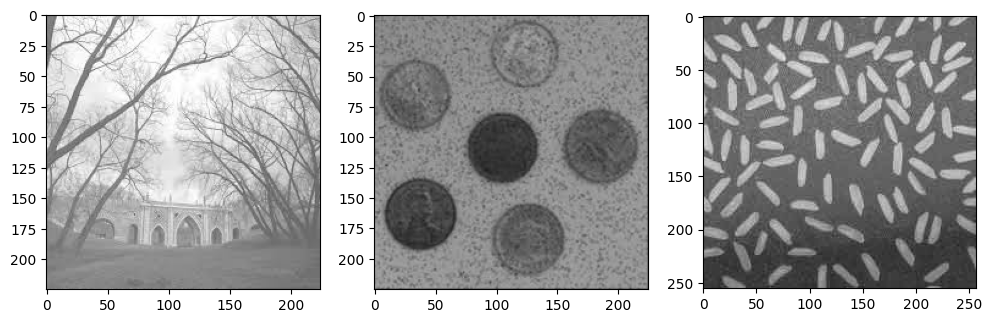

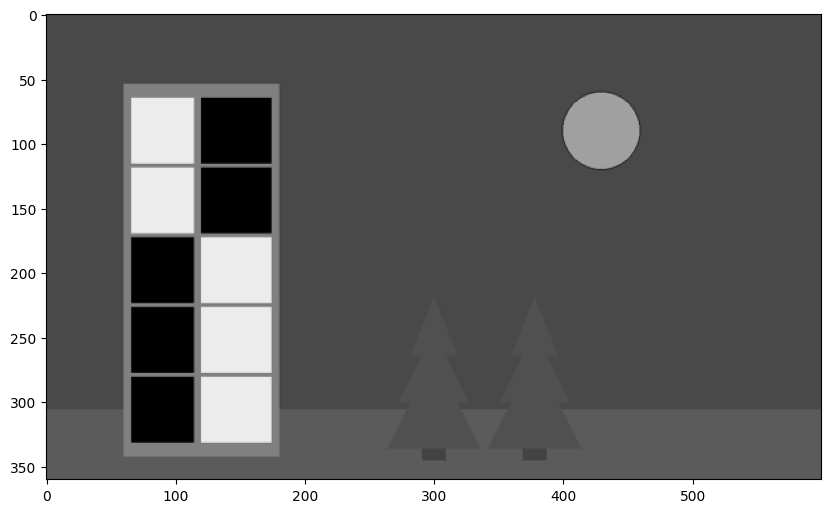

In [3]:
images: list[Image] = [*load_images()]
images[3] = grayscale(images[3])

show_images(images)

2. Постройте гистограммы изображений.

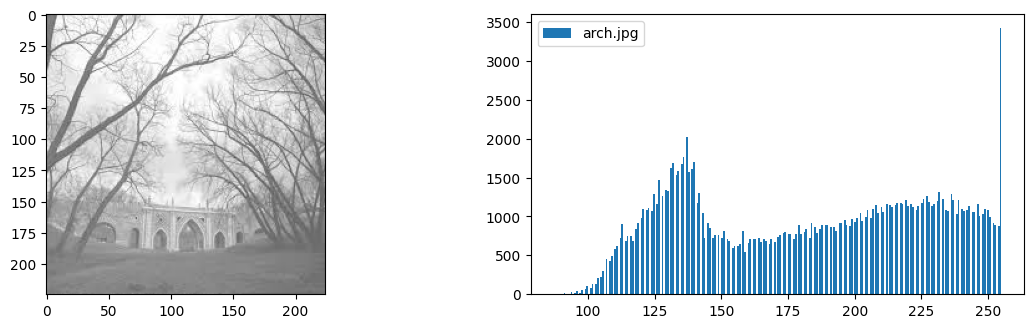

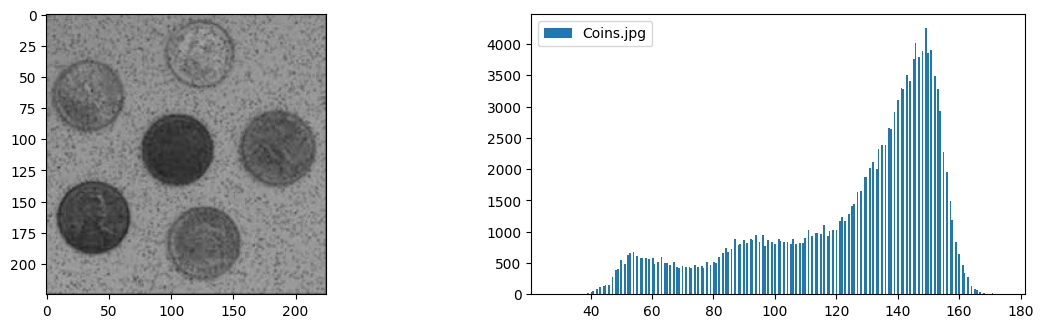

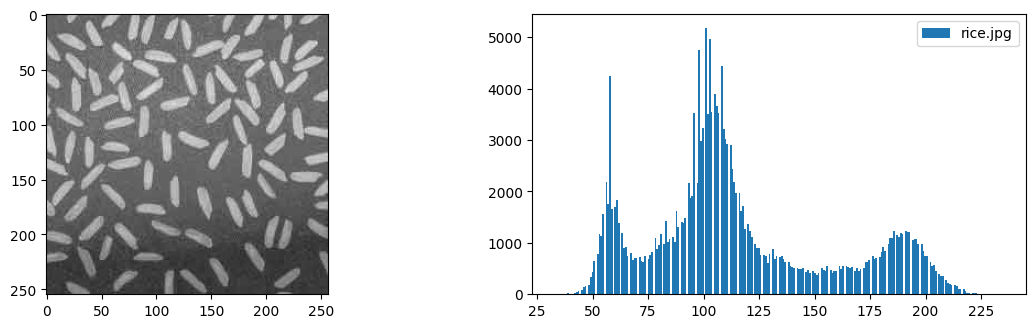

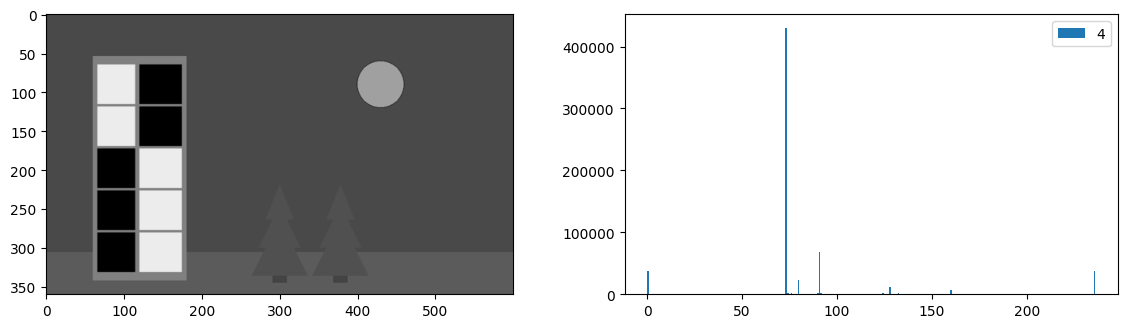

In [4]:
for i, image in enumerate(images):
    label = pathlib.PurePath(image.filename).parts[-1] if hasattr(image, "filename") else i + 1
    plt.figure(figsize=(14,8))
    plt.subplot(2, 2, 1)
    plt.imshow(image)
    plt.subplot(2, 2, 2)
    plt.hist(np.ravel(image), bins=256, label=label)
    plt.legend()
    plt.show()


3. Подберите и выполните логарифмические преобразования изображений с
помощью попиксельной обработки, постройте гистограммы полученных
изображений.

In [5]:
def contrast_log(image: Image, c: int, a: int = 1):
    image_contr = ImageBuilder.fromarray(
        (c * np.log(a + np.array(image))
    ).astype(np.uint8), 'RGB')
    return image_contr

C:\Users\Alex\AppData\Local\Temp\ipykernel_8640\4137618741.py:3: RuntimeWarning: divide by zero encountered in log
  (c * np.log(a + np.array(image))


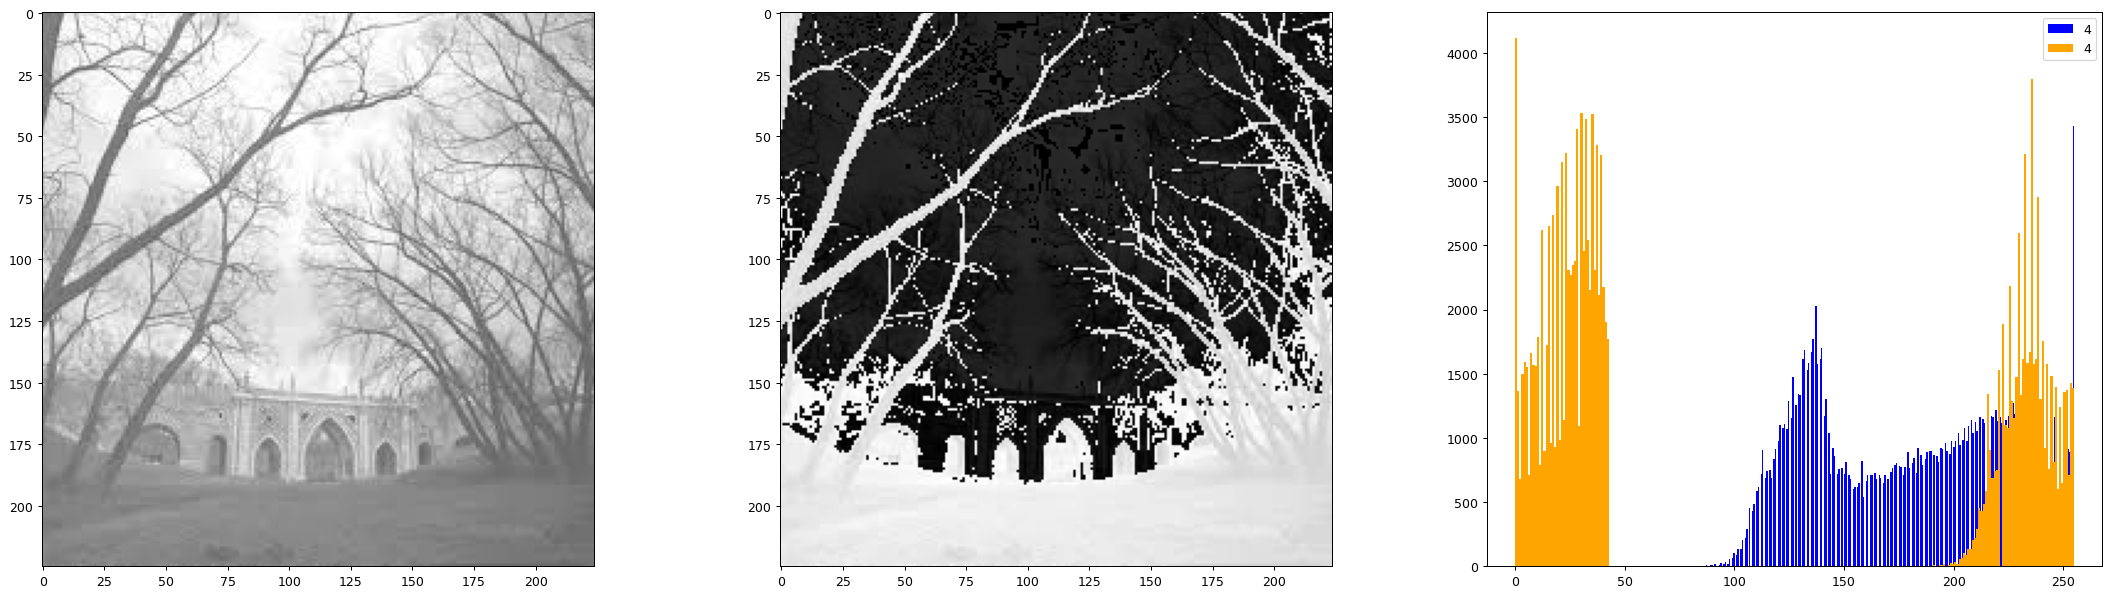

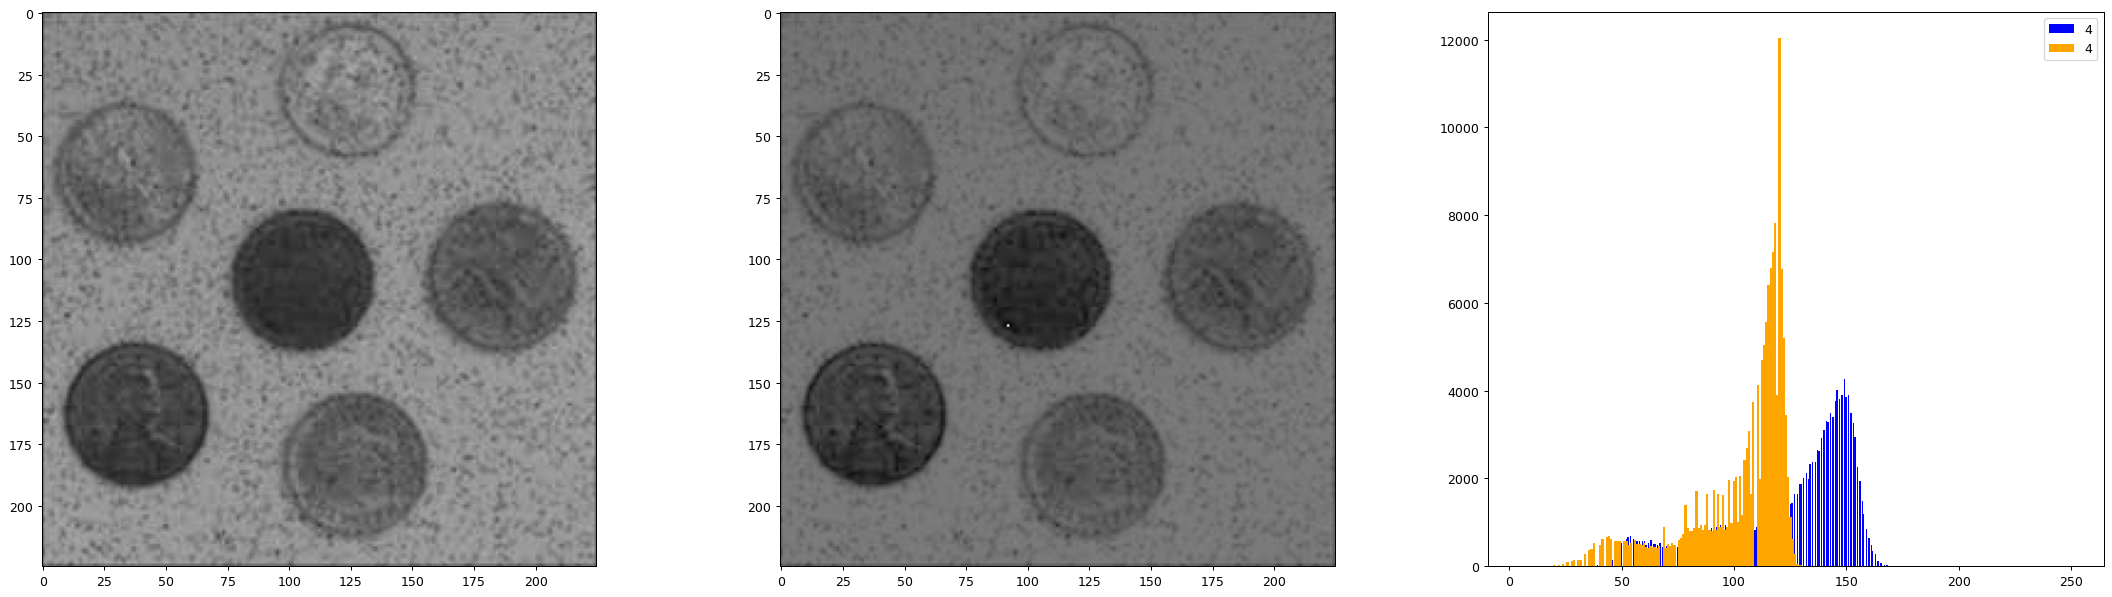

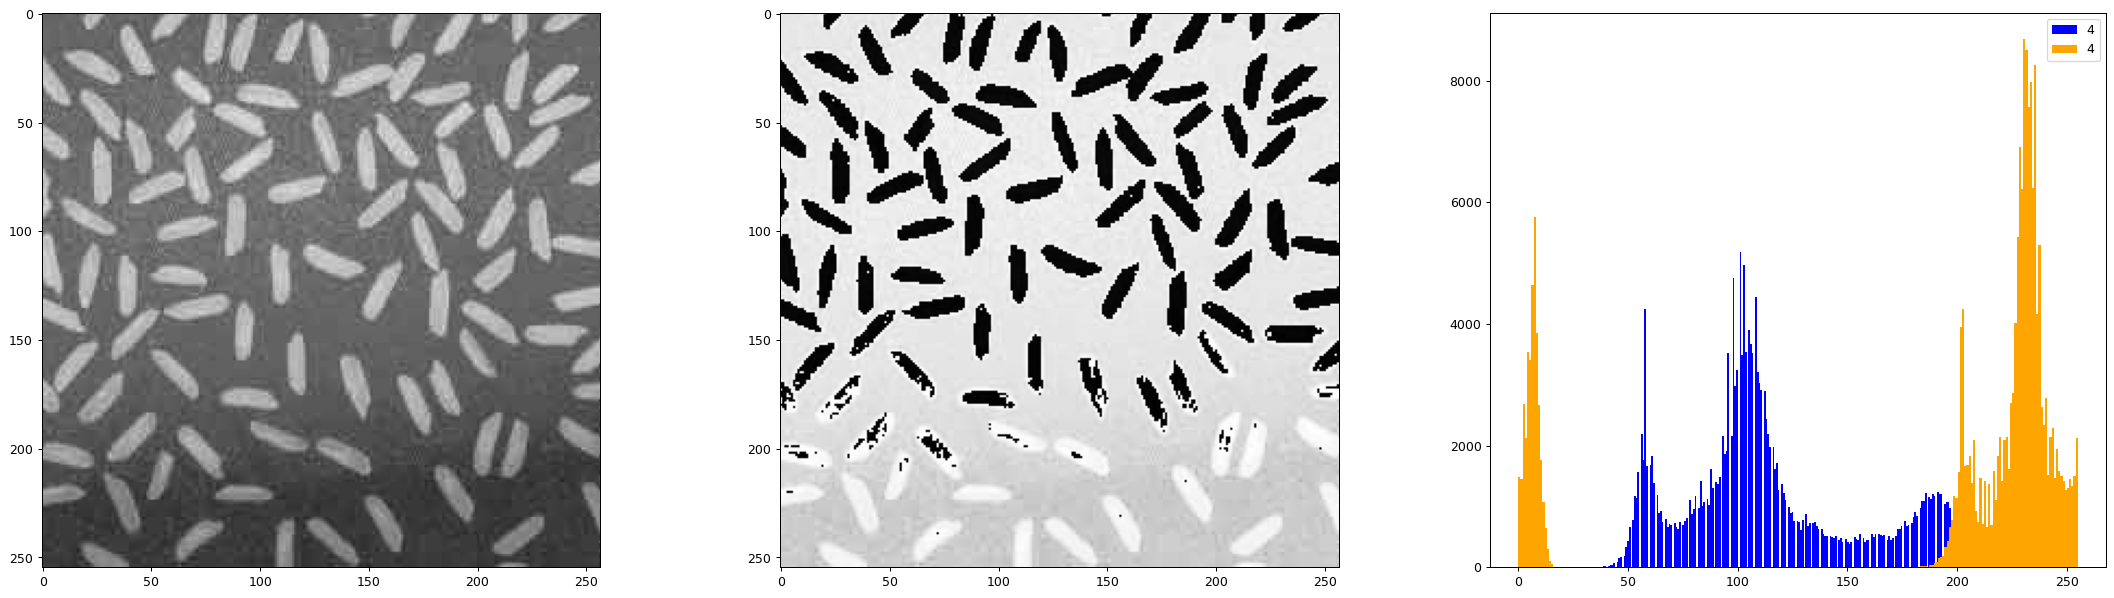

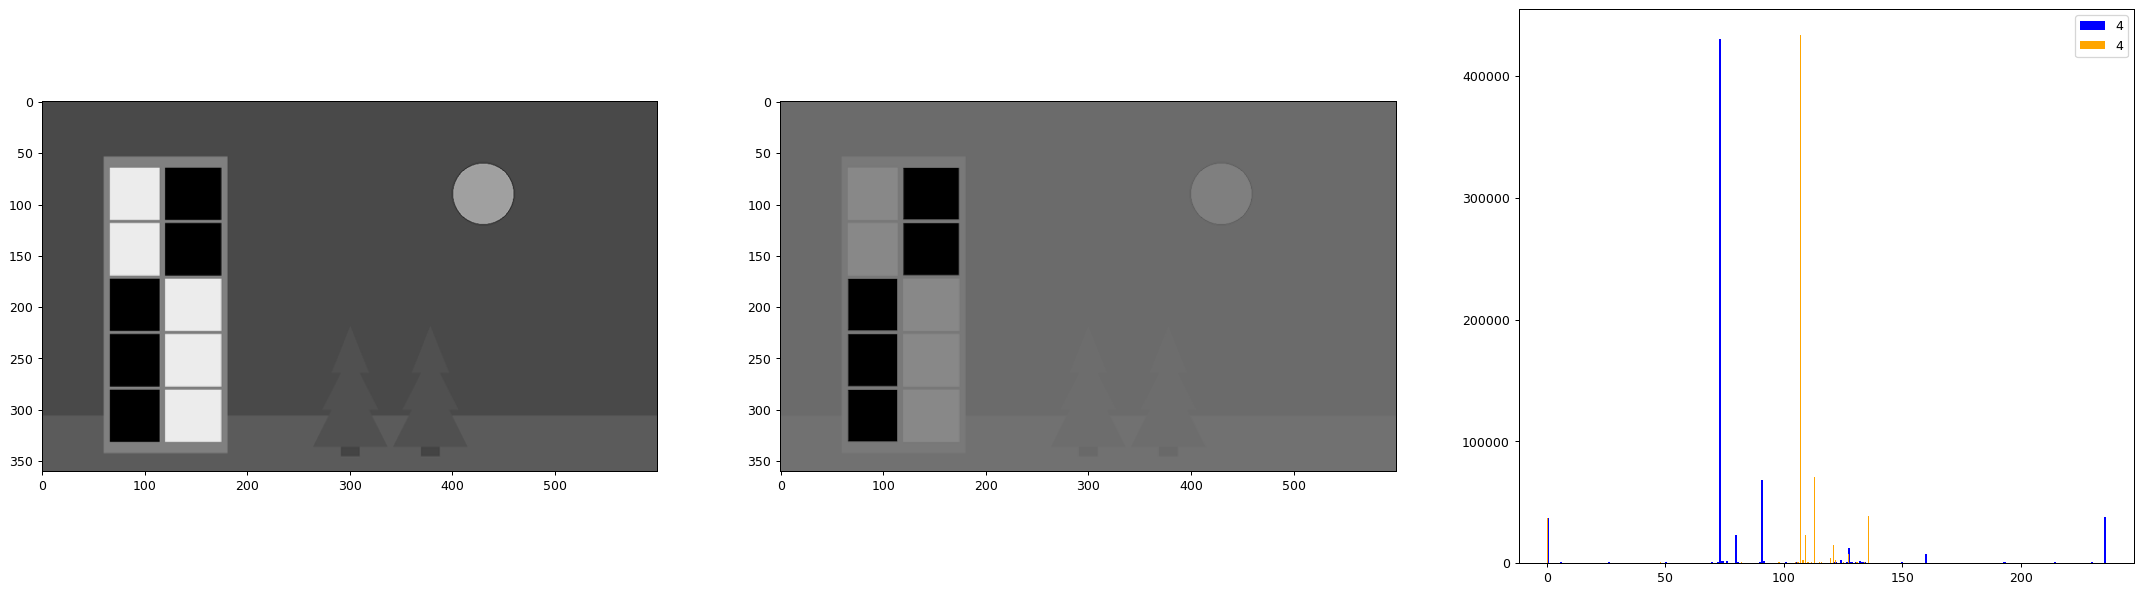

In [6]:
c = (100, 75, 50, 25)

for i, image in enumerate(images):
    image_contr = contrast_log(image, c[i])
    plt.figure(figsize=(30,8), dpi=90)
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.subplot(1, 3, 2)
    plt.imshow(image_contr)
    plt.subplot(1, 3, 3)
    plt.hist(np.ravel(image), bins=256, label=label, color="blue")
    plt.hist(np.ravel(image_contr), bins=256, label=label, color="orange")
    plt.legend()
    plt.show()

In [7]:
# В результате лагарифмичеких преобразований увеличивается разрыв между темными и светлыми пикселями из-за чего увеличивается контраст изображений

(160, 257, 3)

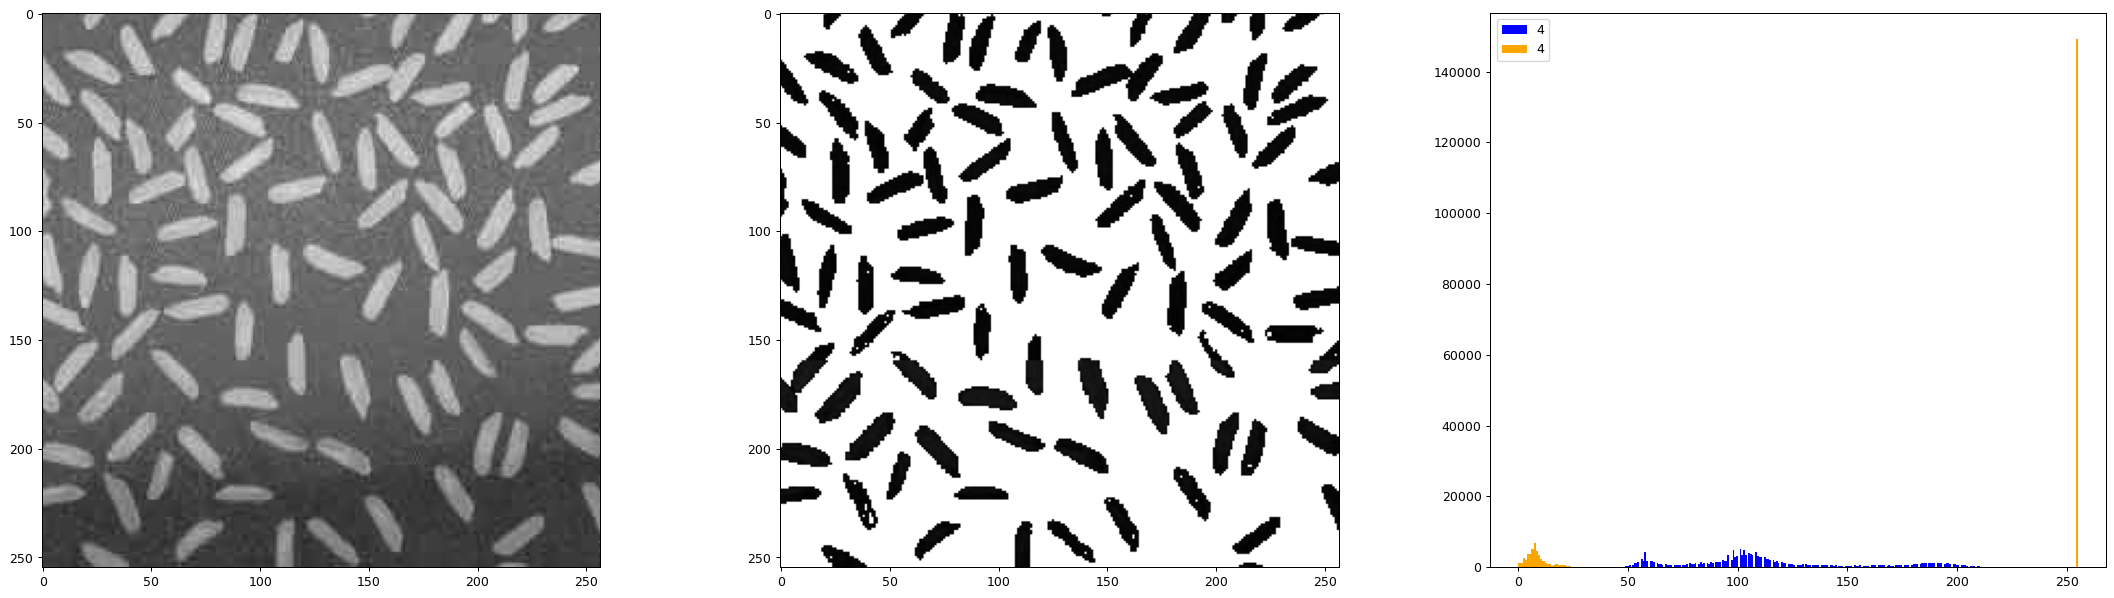

In [8]:
# Убираем черное пятно на третьем изображении для получения более качественного преобразования


image = images[2]

arr = np.array(images[2])

slc = 160

top = (50 * np.log(1 + arr[:slc, :, :])).astype(np.uint8)

display(top.shape)

buttom = (53.5 * np.log(1 + arr[slc:, :, :])).astype(np.uint8)

arr = np.concatenate([top, buttom], axis=0)

shape = arr.shape

for i, x in np.ndenumerate(arr):
    if x > 100:
        arr[i] = 255

image_contr = ImageBuilder.fromarray(arr)

plt.figure(figsize=(30,8), dpi=90)
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.subplot(1, 3, 2)
plt.imshow(image_contr)
plt.subplot(1, 3, 3)
plt.hist(np.ravel(image), bins=256, label=label, color="blue")
plt.hist(np.ravel(image_contr), bins=256, label=label, color="orange")
plt.legend()
plt.show()

4. Подберите степенные преобразования и выполните гамма-коррекцию
изображений, постройте гистограммы полученных изображений. Что можно
сказать про результаты преобразований? Что дает анализ гистограмм?

In [9]:
def contrast_pow(image: Image, y: int, c: int = 1):
    image_contr = ImageBuilder.fromarray(
        c * np.power(np.array(image), y).astype(np.uint8), 'RGB')
    return image_contr

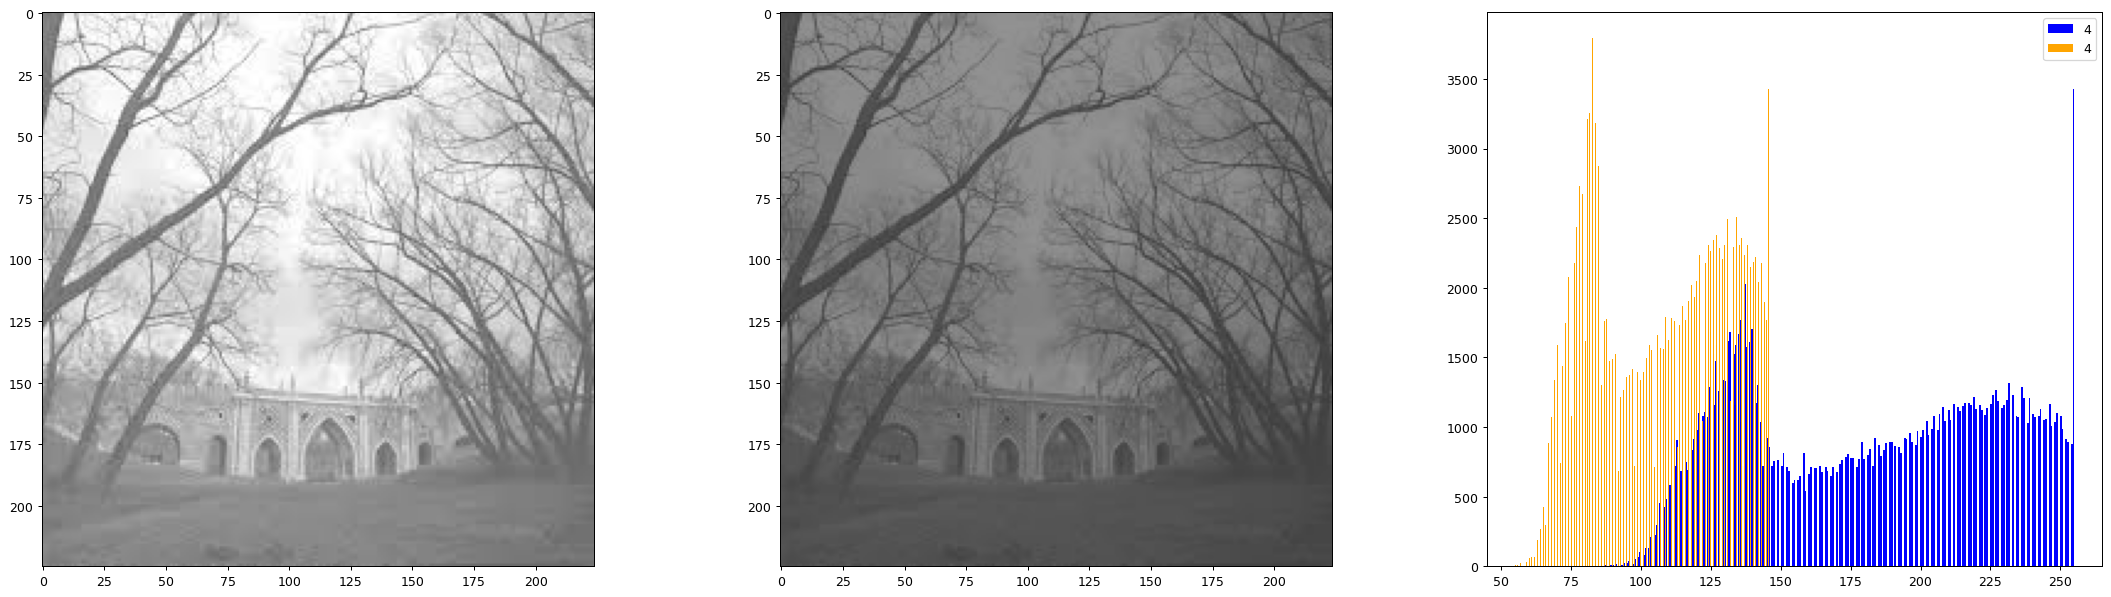

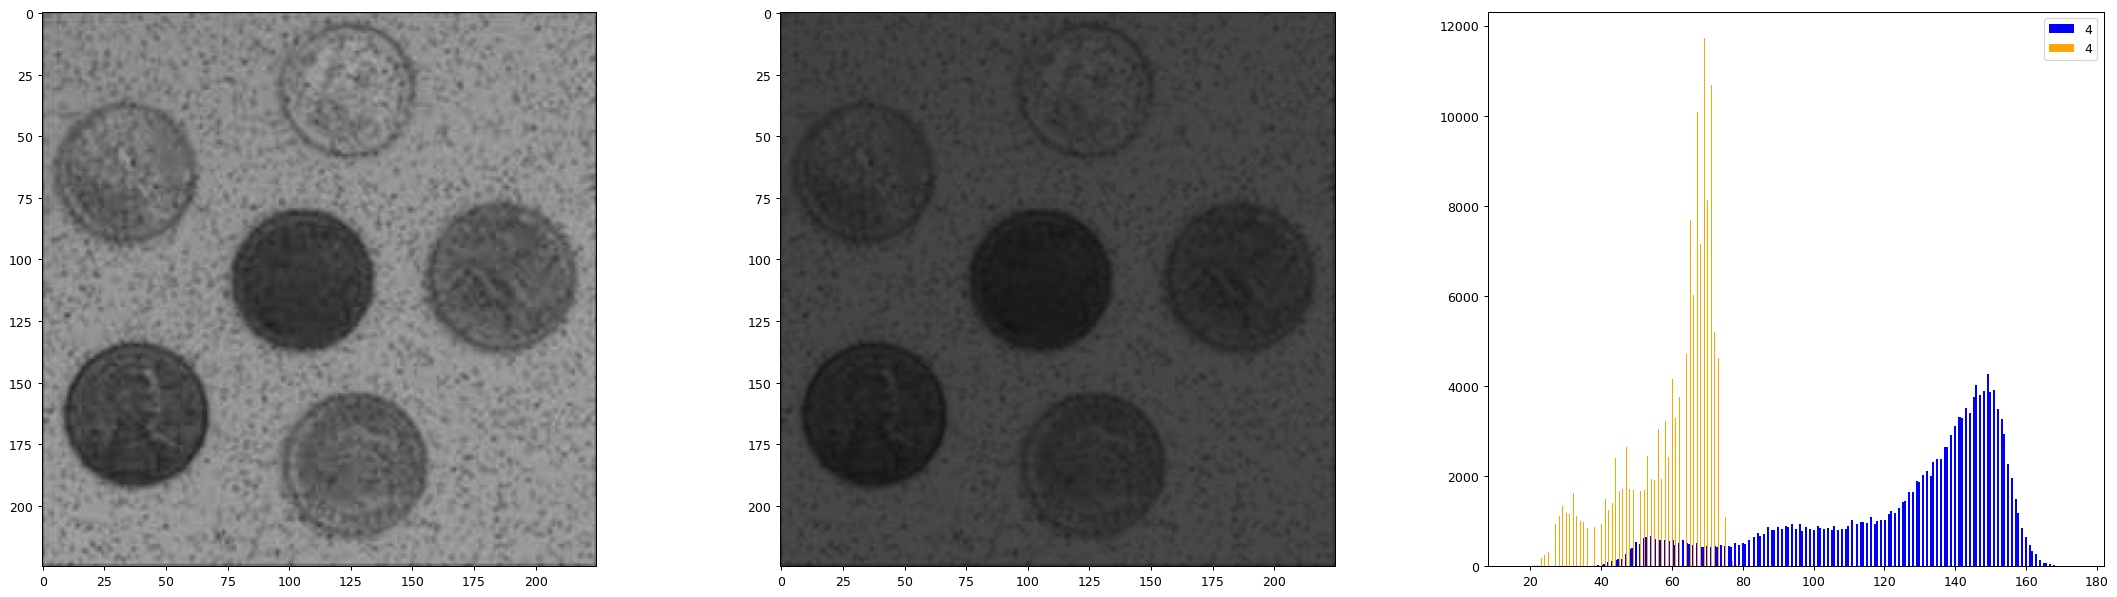

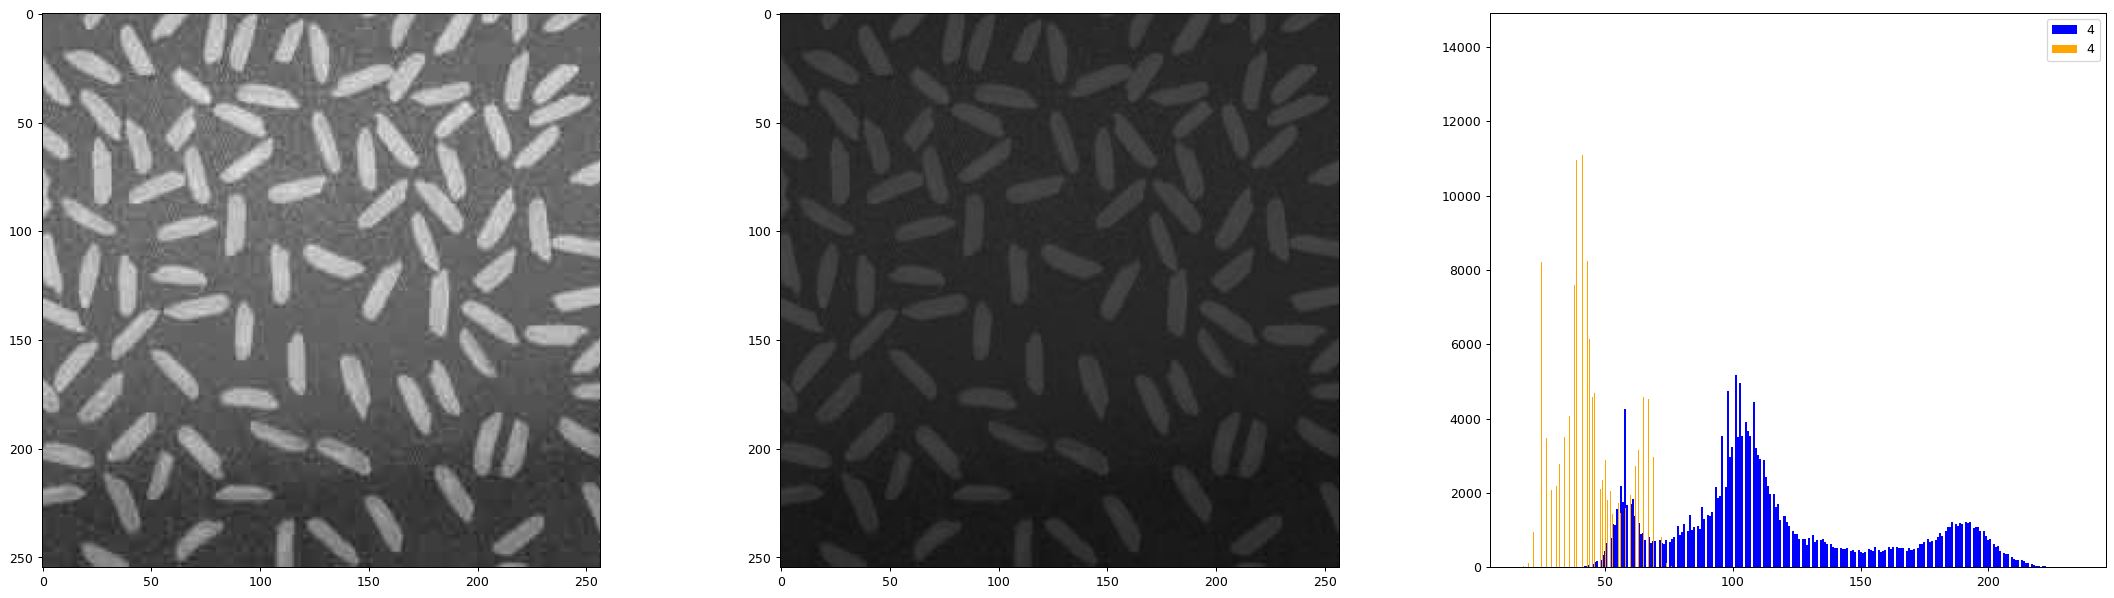

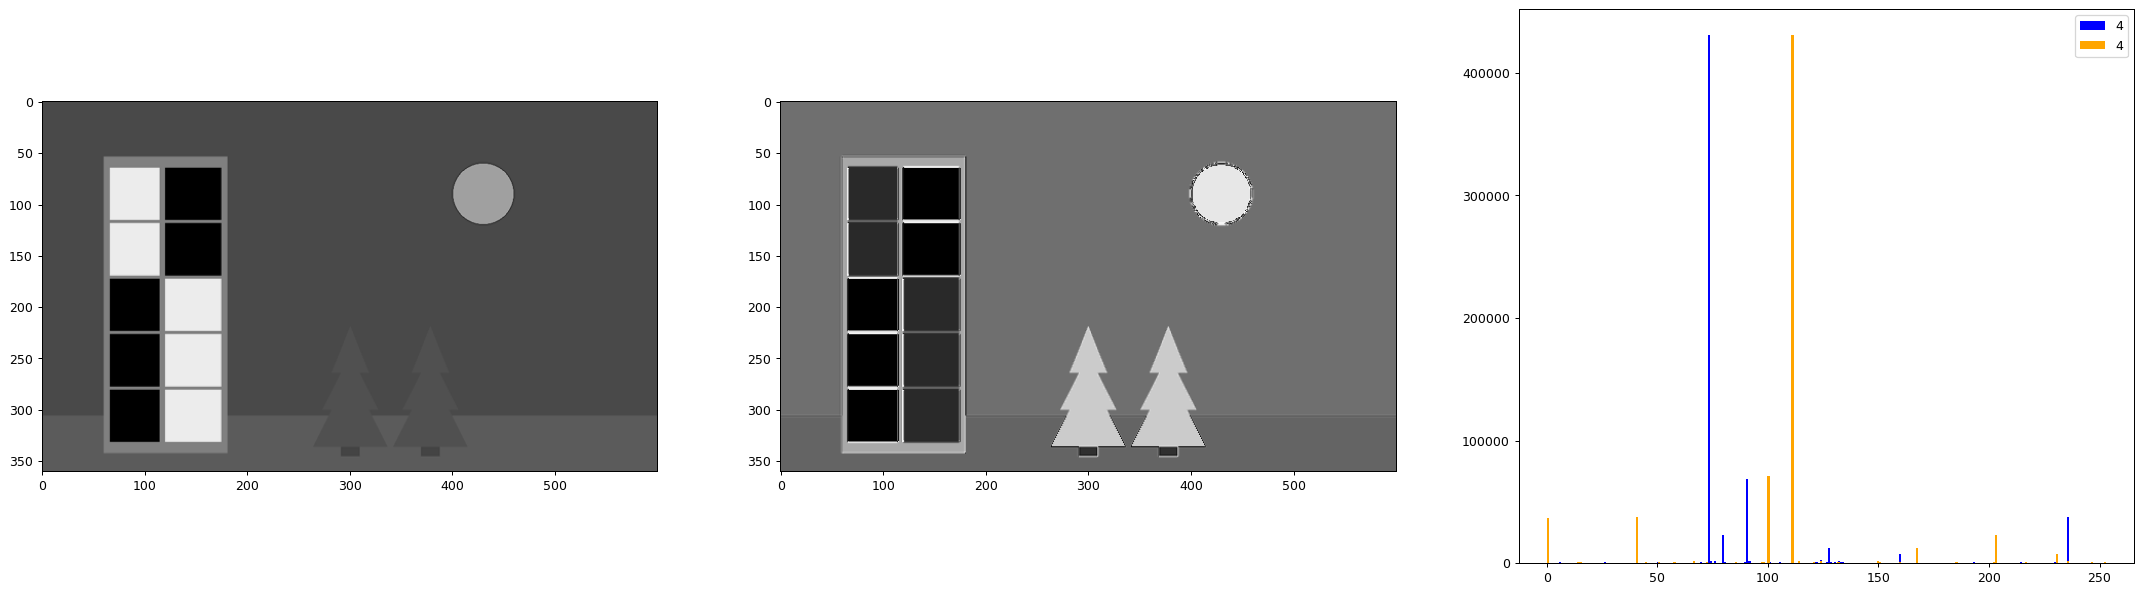

In [10]:
y = (0.9, 0.85, 0.8, 1.5)

for i, image in enumerate(images):
    image_contr = contrast_pow(image, y[i])
    plt.figure(figsize=(30,8), dpi=90)
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.subplot(1, 3, 2)
    plt.imshow(image_contr)
    plt.subplot(1, 3, 3)
    plt.hist(np.ravel(image), bins=256, label=label, color="blue")
    plt.hist(np.ravel(image_contr), bins=256, label=label, color="orange")
    plt.legend()
    plt.show()

In [11]:
# В результате корекции по гистаграмме мы видим что степенное преобразавание сжимает/растягивает диапозон интенсивности пикселов изображений 

5. Поэкспериментируйте с кусочно-линейными преобразованиями вида


In [12]:
L = 255.0

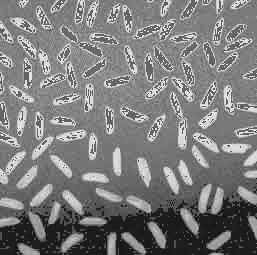

In [13]:
x1 = L/4
x2 =3*L/4

for image in images[2:3]:
    arr = np.array(image)
    for i, x in np.ndenumerate(arr):
        if x >= x1 and x <= x2:
            arr[i] = int(arr[i] * 1.2)
        else:
            arr[i] = int(arr[i] * 0.5)
    display(
        ImageBuilder.fromarray(arr)
    )

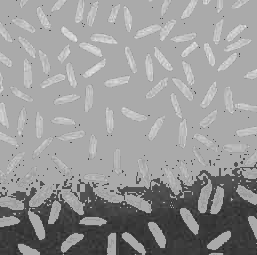

In [14]:
x1 = 85
x2 = 150
s = 255 * 2 / 3

for image in images[2:3]:
    arr = np.array(image)
    for i, x in np.ndenumerate(arr):
        if x >= x1 and x <= x2:
            arr[i] = s
    display(
        ImageBuilder.fromarray(arr)
    )

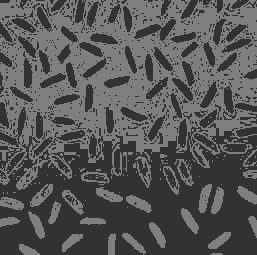

In [15]:
x1 = 100
x2 = 170
s = 255 / 2
s1 = 50

for image in images[2:3]:
    arr = np.array(image)
    for i, x in np.ndenumerate(arr):
        if x >= x1 and x <= x2:
            arr[i] = s
        else:
            arr[i] = s1
    display(
        ImageBuilder.fromarray(arr)
    )

6. Попробуйте выполнить пороговую сегментацию для многопиковых
гистограмм, локализуйте отдельные объекты на изображениях с ее помощью. Что можно сказать про результаты преобразований? Что дает анализ
гистограмм

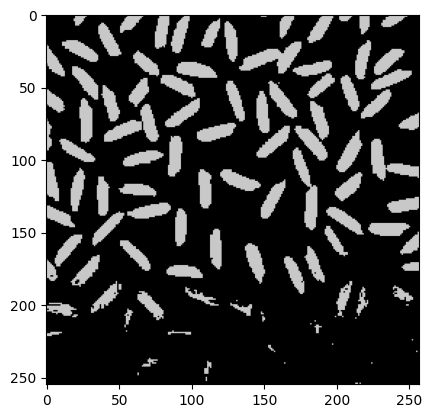

In [17]:
rice = images[2]

arr = np.array(rice)

x = 200

for i, x in np.ndenumerate(arr):
    if x < 150:
        arr[i] = 0
    else:
        arr[i] = 200

image = ImageBuilder.fromarray(arr)

plt.imshow(image)